# <center>Predict Movie Rating from IMDB user reviews using NLP

In [3]:
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import scipy
import requests
import nltk
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup
import nltk
import collections
import re
import csv
import selenium
import psycopg2
%matplotlib inline

In [25]:
imdb = Imdb()
imdb = Imdb(anonymize=True)

In [24]:
local_engine = create_engine('postgresql://smoot@localhost:5432/IMDB')
df = pd.read_sql('SELECT * FROM summary', local_engine, index_col = 'index')
tt = pd.read_sql('SELECT * FROM top25', local_engine)
del df['location']
df.head(2)

,title,summary_review,review_score,movie_score,genre
index,,,,,
0,Raptor Ranch,really not good,2.0,3.1,Action
1,Raptor Ranch,you 're better off stay well clear from this r...,1.0,3.1,Action


In [21]:
df['tconst'] = tt['tconst']

In [28]:
for x in ():
    address = ('http://www.imdb.com/title/' + x + '/reviews')
    html = requests.get(address).text
    soup = BeautifulSoup(html, 'html.parser')

NameError: name 'numid' is not defined

In [27]:
# This if from John's solution code.  Need's the movie title's list to work

reviewList = []

for i in df['title']:
    title5 = imdb.get_title_by_id(i)
    # delay API call to avoid timing out
    time.sleep(random.random())
    user2 = imdb.get_title_reviews(i, max_results = 200)
    for user in user2:
        reviewList.append((title5.title, user.user_location, user.summary, user.rating, title5.rating, title5.genres[0]))



movie_dict = dict()
for x in (reviewList):
    address = ('http://www.imdb.com/title/' + x + '/reviews')
    html = requests.get(address).text
    soup = BeautifulSoup(html, "html.parser")
    title = soup.find("title")
    page = soup.find_all('p')
    foo = str(page)
    regex = re.compile('[^a-zA-Z]')
    new = regex.sub(' ', foo)
    tokens = nltk.word_tokenize(new)
    counter = collections.Counter(tokens)
    movie = counter.most_common()
    test2 = pd.DataFrame(movie)
    test2.columns = ['word', 'rank']
    words = ('best', 'hope', 'love', 'beautiful', 'great')
    test3 = test2.loc[test2['word'].isin(words)]
    movie_dict[title] = test3

HTTPError: 400 Client Error: Bad Request for url: http://openwebproxy.pw/browse.php?u=https%3A//app.imdb.com/title/maindetails%3FapiKey%3Dd2bb34ec6f6d4ef3703c9b0c36c4791ef8b9ca9b%26apiPolicy%3Dapp1_1%26locale%3Den_US%26timestamp%3D1468825200.0%26tconst%3DRaptor%2BRanch%26api%3Dv1%26appid%3Diphone1_1

In [60]:
# Below you can see the summary statistics for review and movie score.  You can also see each unique genre and each 
# unique movie title.

print df.shape
print df.describe()
print pd.unique(df.genre.ravel())
pd.unique(df.title.ravel())

(11038, 5)
       review_score   movie_score
count  11038.000000  11038.000000
mean       7.046883      6.966724
std        3.280443      2.500356
min        1.000000      1.200000
25%        5.000000      5.200000
50%        8.600000      8.500000
75%       10.000000      8.800000
max       10.000000     10.000000
[u'Action' u'Crime' u'Drama' u'Comedy' u'Adventure' u'Horror' u'Animation'
 u'Family' u'Fantasy' u'Documentary' u'Biography' u'Western']


array([u'Raptor Ranch', u'Gunday', u"Independents' Day",
       u'Spy Kids 3-D: Game Over', u'12 Angry Men', u'Carnage Park',
       u"The Huntsman: Winter's War",
       u'Batman v Superman: Dawn of Justice', u'Deadpool',
       u'The Dark Knight', u'Fight Club', u'The Matrix',
       u'The Chaos Class', u'Toni Erdmann', u'The Grand Budapest Hotel',
       u'American Pie', u'X-Men', u'12/12/12',
       u'Ice Age: Collision Course', u'Hot Tub Time Machine 2',
       u'The Shining', u'Super Mario Bros.', u'Tarzan', u'Dirty Movie',
       u'Son of the Mask', u'Kartoffelsalat', u'Nukie',
       u'Battlefield Earth', u'Barb Wire',
       u'Agent Cody Banks 2: Destination London', u'City of God',
       u'Tank Girl', u'Ghostbusters II', u"It's a Wonderful Life",
       u'BoBoiBoy: The Movie', u'Dracula 3000', u'Jaws: The Revenge',
       u'Cabin Fever', u"Jennifer's Body", u'The Purge: Election Year',
       u'Poltergeist', u'Range 15', u'The Lion King', u'Shrek',
       u'Chicken Little', 

,review_score,movie_score
review_score,1.000000,0.609808
movie_score,0.609808,1.000000


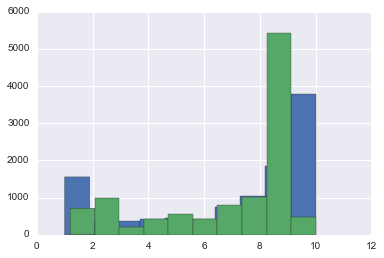

In [61]:
# Correlation table and histogram displaying distribution of review scores and movie scores.  
df.review_score.hist()
df.movie_score.hist()
df.corr()

In [62]:
print df.isnull().sum()
df = df.dropna()

title             0
summary_review    3
review_score      0
movie_score       0
genre             0
dtype: int64


In [63]:
# # function that returns each word in a string as its lemma
# def lemmatize(string):
#     parsed = parser(unicode(string))
#     lemmas = []
#     for token in parsed:
#         if token != None and token != "'":
#             lemmas.append(token.lemma_)
#     return lemmas
# def cleaner(string):
#     parsed = parser(unicode(string))
#     lemmas_unicode = [token.lemma_ for token in parsed]
#     lemmas_string = [unicodedata.normalize('NFKD', i).encode('utf-8') for i in lemmas_unicode]
#     lstring = ''
#     for i in lemmas_string:
#         if i not in  ['\n\n', '!','?','.',',','[0-9]+','[)()-\'/]']:
#             lstring += i
#             lstring += ' '
#     return lstring
# pars = re.compile(r'(\w+[A-Z,?\'a-z][^0-9,\\])')

In [64]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [65]:
X = df['summary_review']
y = df['movie_score']

In [66]:
cvec = CountVectorizer(stop_words = ['of the', 'it', 'and', 'be', 'a'], ngram_range = (4,4), max_features = 30, token_pattern = r"[^0-9\]['u]\w+", analyzer = 'word')
X = cvec.fit_transform(X).todense()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .50, random_state = 1)
columns = cvec.get_feature_names()

In [68]:
print X_train
cvec.get_feature_names()

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


[u' as  good  as  the',
 u' bad  movie  i  have',
 u' be  one  of  the',
 u' best  film  ever  make',
 u' best  movie  ever  make',
 u' best  movie  i  have',
 u' best  movie  of  all',
 u' film  i  have  ever',
 u' film  of  all  time',
 u' good  as  the  first',
 u' i  have  ever  see',
 u' lord  of  the  ring',
 u' movie  i  have  ever',
 u' movie  i  have  see',
 u' movie  of  all  time',
 u' of  the  best  film',
 u' of  the  best  movie',
 u' of  the  great  film',
 u' one  of  the  best',
 u' one  of  the  great',
 u' the  best  film  ever',
 u' the  best  film  of',
 u' the  best  movie  ever',
 u' the  best  movie  of',
 u'not  as  good  as',
 u'one  of  the  bad',
 u'one  of  the  best',
 u'one  of  the  great',
 u'one  of  the  most',
 u'the  best  movie  ever']

# <center>Decision Tree Regressor Feature Selection

In [69]:
dtreg = DecisionTreeRegressor()
dtreg_f = dtreg.fit(X_train, y_train)
y_pred = dtreg.predict(X_test)

MSE: 6.3099


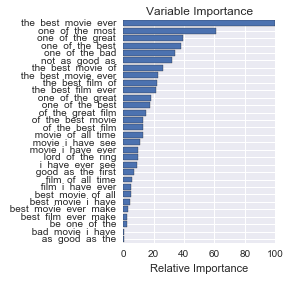

In [70]:
# Feature importance relative to max importance using Decision Tree Regressor

mse_dtreg = mean_squared_error(y_test, dtreg.predict(X_test))
print("MSE: %.4f" % mse_dtreg)
feature_importance = dtreg.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.xlabel('Relative Importance')
plt.yticks(pos, columns)
plt.Text(cvec.get_feature_names())
plt.title('Variable Importance')
plt.Figure(figsize = (7, 9))
plt.show()

In [71]:
# Feature Importance using Decision Tree Regressor 

cols = ['feature']
fi_score = dtreg.feature_importances_
fi = cvec.get_feature_names()
importance = pd.DataFrame(fi, columns = cols)
importance['feature_score'] = fi_score
importance.sort_values('feature_score', ascending = False).head()

,feature,feature_score
26,one of the best,0.176179
25,one of the bad,0.107457
1,bad movie i have,0.069884
27,one of the great,0.067469
28,one of the most,0.060129


#  <center>ADABoost Regressor Feature Selection

In [72]:
# Feature Importance using ADABoost Regressor.
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=1)
ada.fit(X_train, y_train)
y_pred2 = ada.predict(X_test)

MSE: 6.2597


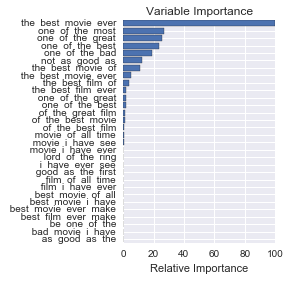

In [73]:
# Feature importance relative to max importance using ADABoost Regressor

mse_ada = mean_squared_error(y_test, ada.predict(X_test))
print("MSE: %.4f" % mse_ada)
feature_importance = ada.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.xlabel('Relative Importance')
plt.yticks(pos, columns)
plt.Text(cvec.get_feature_names())
plt.title('Variable Importance')
plt.Figure(figsize = (7, 9))
plt.show()

In [74]:
cols = ['feature']
fi_score = ada.feature_importances_
fi = cvec.get_feature_names()
importance = pd.DataFrame(fi, columns = cols)
importance['feature_score'] = fi_score
importance.sort_values('feature_score', ascending = False).head()

,feature,feature_score
26,one of the best,0.418172
18,one of the best,0.111766
8,film of all time,0.107342
25,one of the bad,0.099211
12,movie i have ever,0.080784


# <center>Gradient Boosting Regressor Feature Selection</center>

In [75]:
clf = GradientBoostingRegressor(loss = 'ls', n_estimators = 300, min_samples_split = 2, max_depth = 4)
clf.fit(X_train, y_train)
y_preda = clf.predict(X_test)

MSE: 6.2916


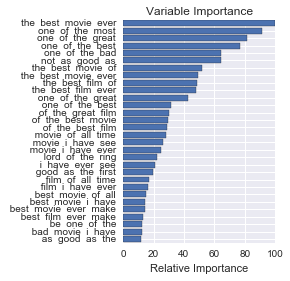

In [76]:
# Feature importance using Gradient Boosting Regressor

mse_clf = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse_clf)
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.xlabel('Relative Importance')
plt.yticks(pos, columns)
plt.Text(cvec.get_feature_names())
plt.title('Variable Importance')
plt.Figure(figsize = (7, 9))
plt.show()

In [24]:
cols = ['feature']
fi_score = clf.feature_importances_
fi = cvec.get_feature_names()
importance = pd.DataFrame(fi, columns = cols)
importance['feature_score'] = fi_score
importance.sort_values('feature_score', ascending = False).head()

,feature,feature_score
6,i have ever see,0.139783
18,one of the most,0.121262
17,one of the great,0.095892
10,of the best movie,0.085887
0,as good as the,0.079574


In [57]:
# I used to be able to visualize decision trees but I've messed it up now and it isn't working.  So that is really too 
# bad.

from IPython.display import Image
from sklearn import tree
dot_data = StringIO()  
export_graphviz(dtreg, out_file='tree.dot',  
                         feature_names=columns, filled=True, rounded=True, special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

NameError: global name 'dot_parser' is not defined